In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Utility Functions


plot the data distribution


In [58]:
def plot_distribution(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of column {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


box plot


In [59]:
def plot_box_strip(data, column):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')
    plt.show()


scatter plot + box plot for visualizing the target column vs features


In [60]:

def plot_target_vs_numerical_grid(df, target, num_features, cols=2):
    rows = math.ceil(len(num_features) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(num_features):
        unique_vals = df[col].nunique()
        
        if unique_vals == 2:
            # Use boxplot for binary features
            sns.boxplot(x=df[col].astype(str), y=df[target], ax=axes[i])
            axes[i].set_xlabel(f'{col} (binary)')
        else:
            # Use scatterplot for continuous features
            sns.scatterplot(x=df[col], y=df[target], alpha=0.6, ax=axes[i])
            # sns.regplot(x=df[col], y=df[target], scatter=False, color='red', ax=axes[i])
            axes[i].set_xlabel(col)

        axes[i].set_title(f'{target} vs {col}')
        axes[i].set_ylabel(target)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
# box plot for categorical features
def plot_target_vs_categorical(df, target, cat_features):
    for col in cat_features:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col], y=df[target], palette='Set2')
        plt.title(f'{target} by {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.show()


correlation heatmap


In [61]:
def correlation_heatmap(df, target):
    corr = df.corr(numeric_only=True)
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
    plt.title(f'Correlation with {target}')
    plt.show()


correlation matrix


In [62]:
def plot_correlation_matrix(df):
    corr_matrix = df.corr(numeric_only=True)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Matrix")
    plt.show()

### Reading the data + some aggregation


In [63]:
dataset = pd.read_csv('data/servo.data', header=None)

In [64]:
dataset.head()

,0,1,2,3,4
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       167 non-null    object 
 1   1       167 non-null    object 
 2   2       167 non-null    int64  
 3   3       167 non-null    int64  
 4   4       167 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


no missing values


In [66]:
dataset.describe()

,2,3,4
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,1.389708
std,1.017770,1.369850,1.559635
min,3.000000,1.000000,0.131250
25%,3.000000,1.000000,0.503126
50%,4.000000,2.000000,0.731254
75%,5.000000,4.000000,1.259369
max,6.000000,5.000000,7.100108


In [67]:
dataset.columns

Index([0, 1, 2, 3, 4], dtype='int64')

# The column names


As described in the servo.names file:

7. Attribute information:

   1. motor: A,B,C,D,E
   2. screw: A,B,C,D,E
   3. pgain: 3,4,5,6
   4. vgain: 1,2,3,4,5
   5. class: 0.13 to 7.10


Renaming the columns for better readability


In [68]:
dataset = dataset.rename(
    columns={
        0: 'motor',
        1: 'screw',
        2: 'pgain',
        3: 'vgain',
        4: 'y'
    }
)

In [69]:
num_features = dataset.select_dtypes(include=np.number).columns.drop('y').tolist()
cat_features = dataset.select_dtypes(exclude=np.number).columns.tolist()


## Scaling


In [70]:
scaler = StandardScaler()

features = dataset[num_features]
scaled_features = scaler.fit_transform(features)

data = pd.DataFrame(scaled_features, columns=num_features)
data = pd.concat([dataset[cat_features],data],axis=1)
data

,motor,screw,pgain,vgain
0,E,E,0.832065,1.069805
1,B,D,1.817560,1.802008
2,D,D,-0.153430,0.337602
3,B,A,-1.138926,-0.394600
4,D,B,1.817560,1.802008
...,...,...,...,...
162,B,C,-1.138926,-0.394600
163,B,E,-1.138926,-1.126803
164,C,D,-0.153430,0.337602
165,A,B,-1.138926,-0.394600


# Encoding


encoding categorical features with One-Hot encoding


In [71]:
dataset_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)
dataset_encoded

,pgain,vgain,motor_B,motor_C,motor_D,motor_E,screw_B,screw_C,screw_D,screw_E
0,0.832065,1.069805,False,False,False,True,False,False,False,True
1,1.817560,1.802008,True,False,False,False,False,False,True,False
2,-0.153430,0.337602,False,False,True,False,False,False,True,False
3,-1.138926,-0.394600,True,False,False,False,False,False,False,False
4,1.817560,1.802008,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,-1.138926,-0.394600,True,False,False,False,False,True,False,False
163,-1.138926,-1.126803,True,False,False,False,False,False,False,True
164,-0.153430,0.337602,False,True,False,False,False,False,True,False
165,-1.138926,-0.394600,False,False,False,False,True,False,False,False


We replace pd.getdumies with OneHotEncoder from sck


In [72]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(drop='first', sparse_output= False)

# # Fit and transform the categorical features
# encoded_array = encoder.fit_transform(data[cat_features])

# # Get the new column names
# encoded_cols = encoder.get_feature_names_out(cat_features)

# # Create a DataFrame from the encoded data
# encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=data.index)

# # Drop the original categorical columns and concatenate the encoded ones
# dataset_encoded = pd.concat([data.drop(columns=cat_features), encoded_df], axis=1)


In [73]:
dataset_encoded


,pgain,vgain,motor_B,motor_C,motor_D,motor_E,screw_B,screw_C,screw_D,screw_E
0,0.832065,1.069805,False,False,False,True,False,False,False,True
1,1.817560,1.802008,True,False,False,False,False,False,True,False
2,-0.153430,0.337602,False,False,True,False,False,False,True,False
3,-1.138926,-0.394600,True,False,False,False,False,False,False,False
4,1.817560,1.802008,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,-1.138926,-0.394600,True,False,False,False,False,True,False,False
163,-1.138926,-1.126803,True,False,False,False,False,False,False,True
164,-0.153430,0.337602,False,True,False,False,False,False,True,False
165,-1.138926,-0.394600,False,False,False,False,True,False,False,False


In [74]:
data = dataset_encoded
data['y'] = dataset['y'].values


In [75]:
data

,pgain,vgain,motor_B,motor_C,motor_D,motor_E,screw_B,screw_C,screw_D,screw_E,y
0,0.832065,1.069805,False,False,False,True,False,False,False,True,0.281251
1,1.817560,1.802008,True,False,False,False,False,False,True,False,0.506252
2,-0.153430,0.337602,False,False,True,False,False,False,True,False,0.356251
3,-1.138926,-0.394600,True,False,False,False,False,False,False,False,5.500033
4,1.817560,1.802008,False,False,True,False,True,False,False,False,0.356251
...,...,...,...,...,...,...,...,...,...,...,...
162,-1.138926,-0.394600,True,False,False,False,False,True,False,False,4.499986
163,-1.138926,-1.126803,True,False,False,False,False,False,False,True,3.699967
164,-0.153430,0.337602,False,True,False,False,False,False,True,False,0.956256
165,-1.138926,-0.394600,False,False,False,False,True,False,False,False,4.499986


# Visualization


visualize features with the target


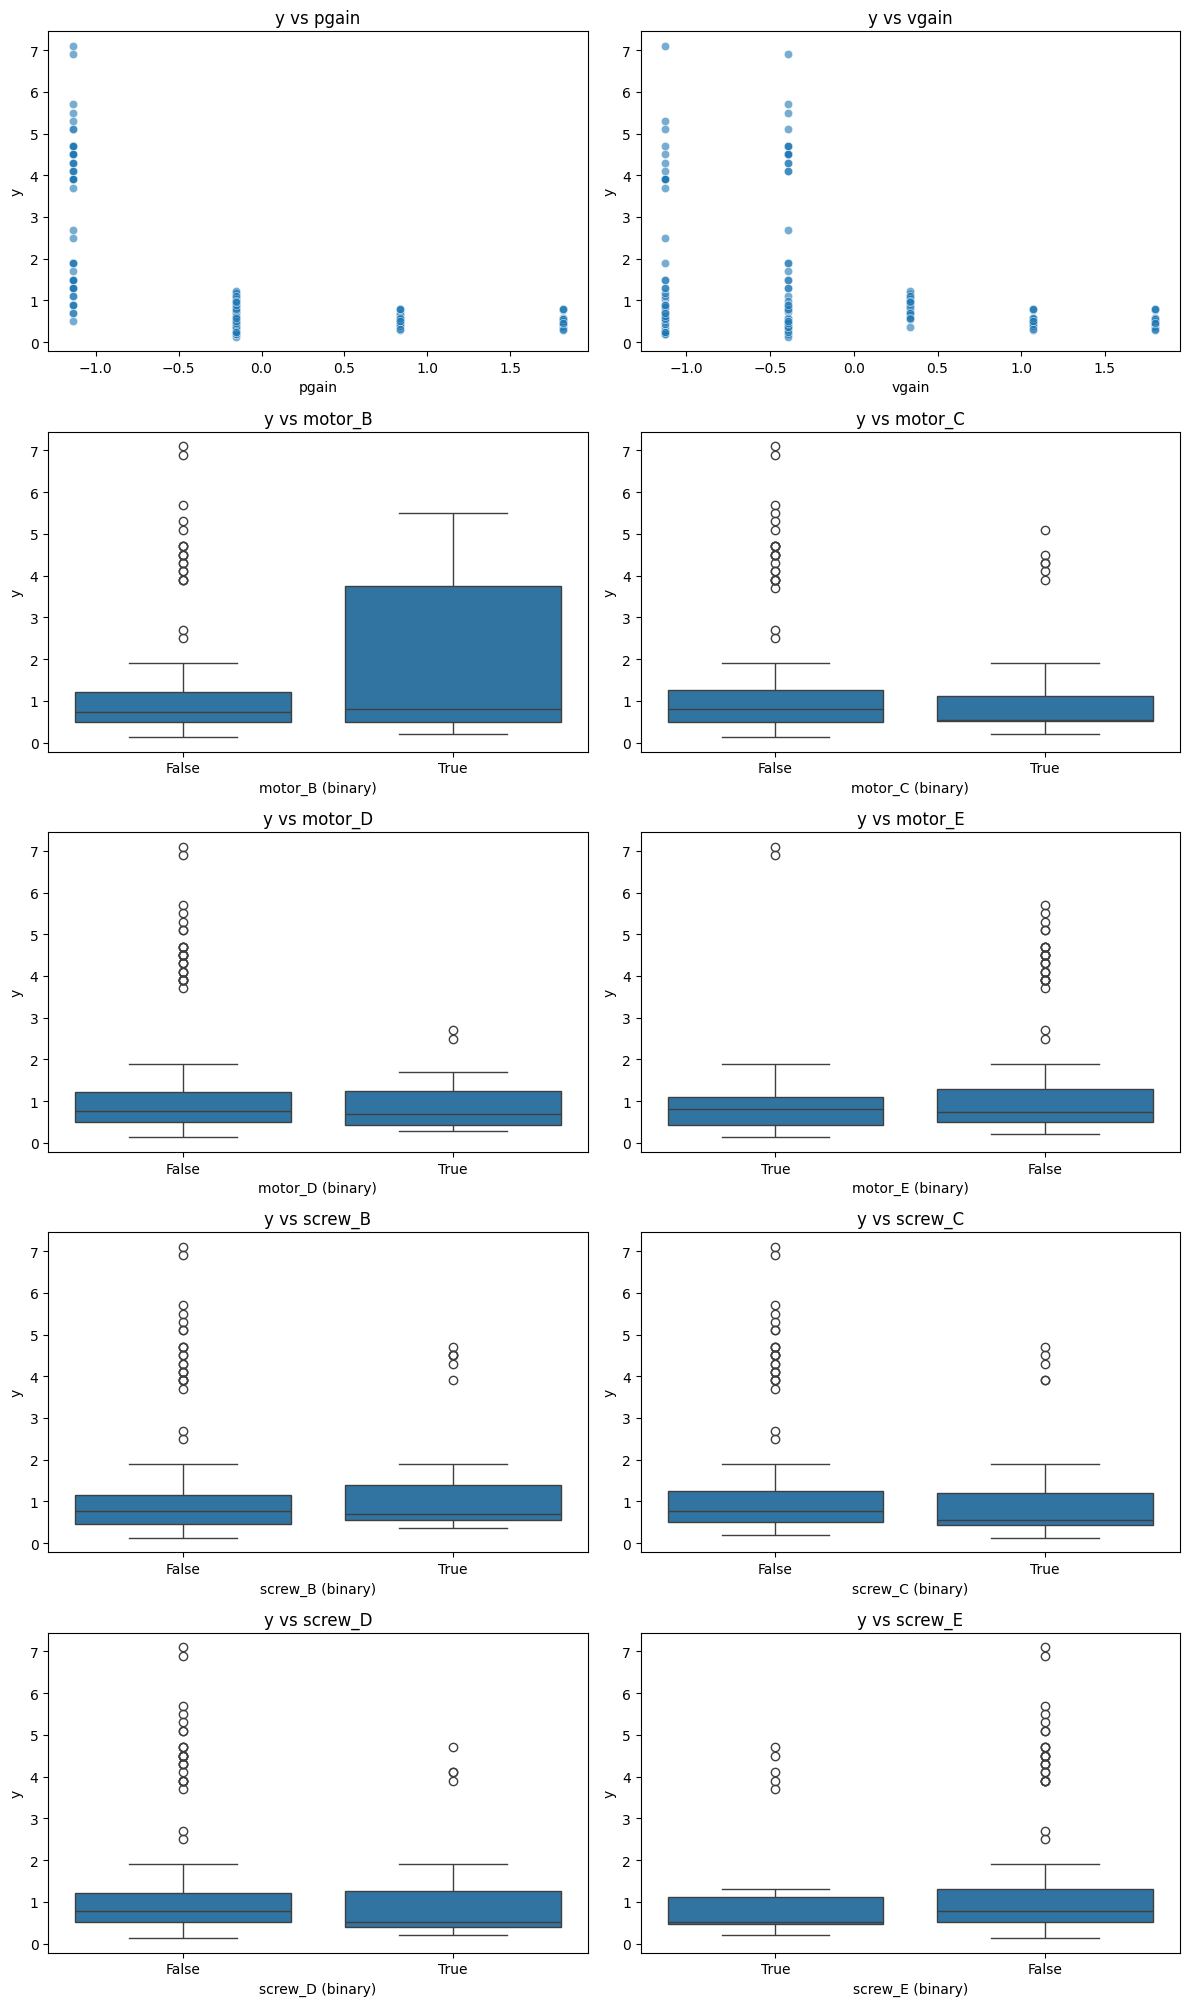

In [76]:
plot_target_vs_numerical_grid(data, 'y', data.drop(columns=['y']))

correlation matrix


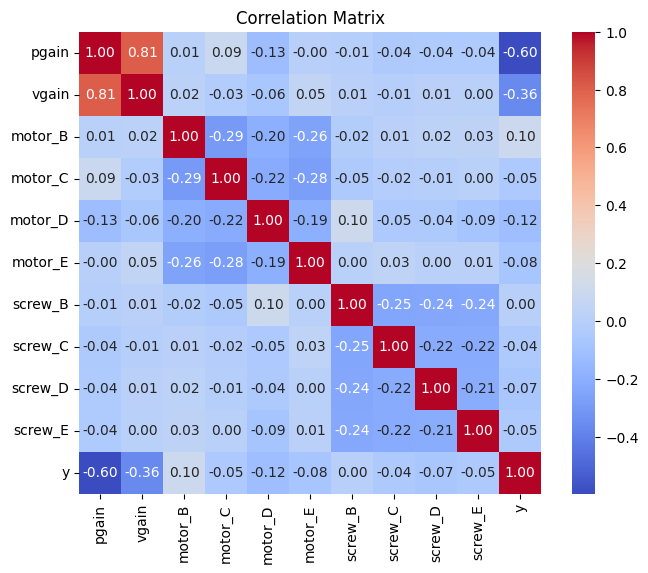

In [77]:
plot_correlation_matrix(data)

## Splitting the data for train and test


In [78]:
X = data.drop('y', axis=1)
y = data['y']

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train a Linear Regression Model


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()


In [81]:
model.fit(X_train, y_train)


LinearRegression()

### model coefficients


In [82]:
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")


pgain: -1.53261921899687
vgain: 0.6584429637548815
motor_B: -0.01750436919895433
motor_C: -0.18270701499105277
motor_D: -1.359497681356239
motor_E: -0.6288175345461454
screw_B: -0.7138589945352881
screw_C: -1.0918905744609557
screw_D: -1.266165689049419
screw_E: -1.0929054043084956


In [83]:
y_pred = model.predict(X_test)


In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [85]:
from sklearn.ensemble import RandomForestRegressor


In [86]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [50, 100, 200, 250, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2']
}
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=grid_params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, y_train)

c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 250, 300]},
             scoring='neg_mean_squared_error')

In [87]:
print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)


Best parameters for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [88]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],               # Typical values for boosting
    'learning_rate': [0.01, 0.1, 0.3],     # Boosting step size
    'subsample': [0.6, 0.8, 1.0],          # Row sampling
    'colsample_bytree': [0.6, 0.8, 1.0]    # Feature sampling
}

xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')  # 'reg:squarederror' for regression

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search_xgb.fit(X_train, y_train)


c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [89]:
print("Best parameters for XGBoost:")
print(grid_search_xgb.best_params_)


Best parameters for XGBoost:
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


In [90]:
# For Random Forest
best_score_rf = np.sqrt(-grid_search_rf.best_score_)  # Convert negative MSE to RMSE
print(f"Best RMSE for Random Forest: {best_score_rf:.4f}")

# For XGBoost
best_score_xgb = np.sqrt(-grid_search_xgb.best_score_)
print(f"Best RMSE for XGBoost: {best_score_xgb:.4f}")

Best RMSE for Random Forest: 0.9206
Best RMSE for XGBoost: 0.7587


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Get best models
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"📊 Evaluation for {name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  R²  : {r2:.4f}\n")




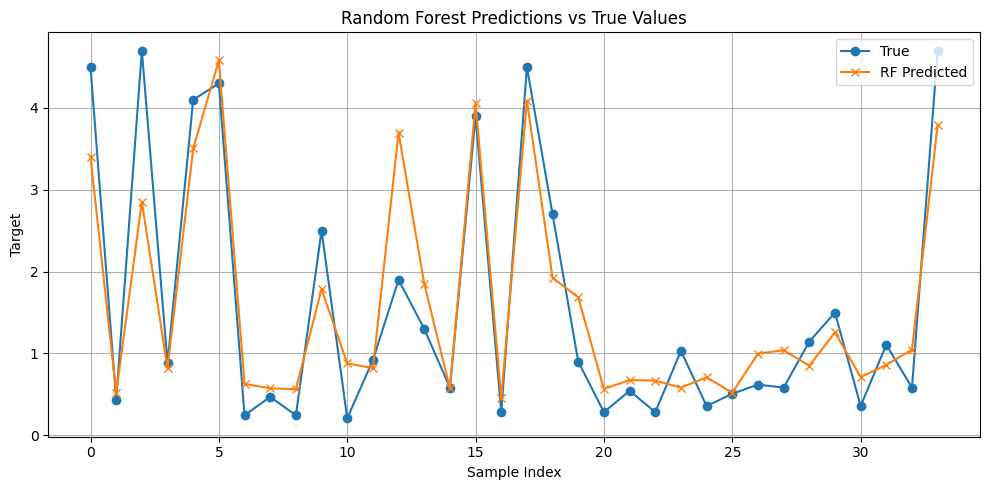

📊 Evaluation for Random Forest:
  RMSE: 0.6317
  MAE : 0.4673
  R²  : 0.8351



In [92]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="True", marker='o')
plt.plot(y_pred_rf, label="RF Predicted", marker='x')
plt.legend()
plt.title("Random Forest Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluate 
evaluate_model(y_test, y_pred_rf, "Random Forest")

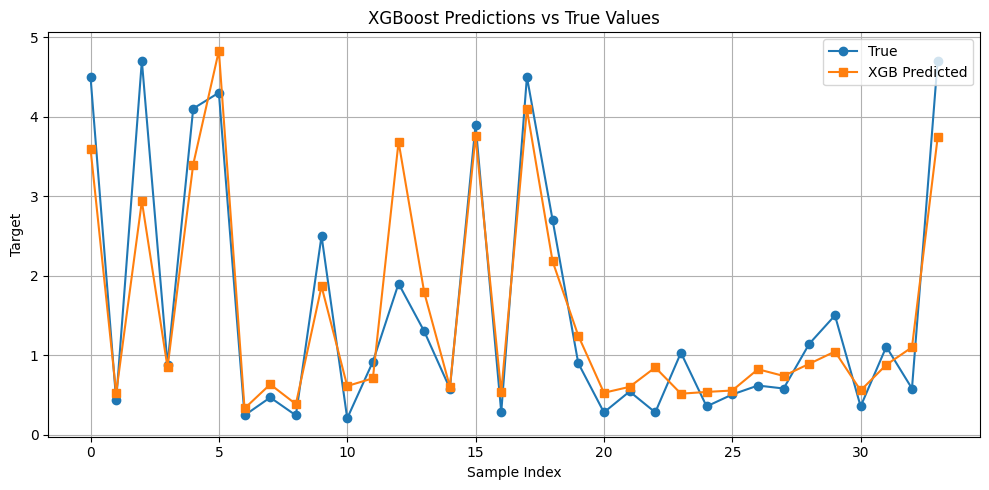

📊 Evaluation for XGBoost:
  RMSE: 0.5877
  MAE : 0.4185
  R²  : 0.8572



In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="True", marker='o')
plt.plot(y_pred_xgb, label="XGB Predicted", marker='s')
plt.legend()
plt.title("XGBoost Predictions vs True Values")
plt.xlabel("Sample Index")
plt.ylabel("Target")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate 
evaluate_model(y_test, y_pred_xgb, "XGBoost")



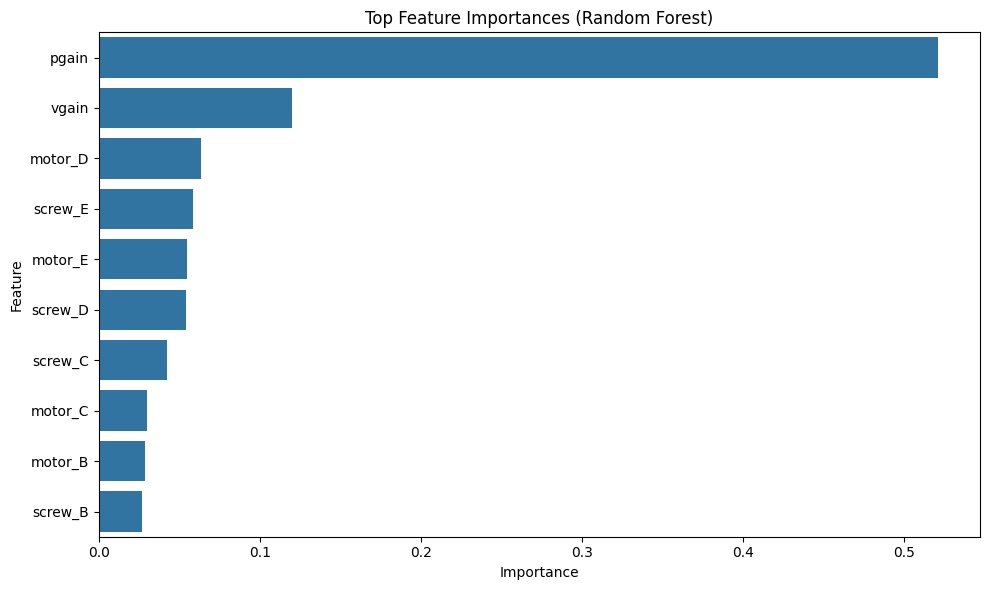

In [99]:
importances = best_rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(20))  # Top 20 features
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


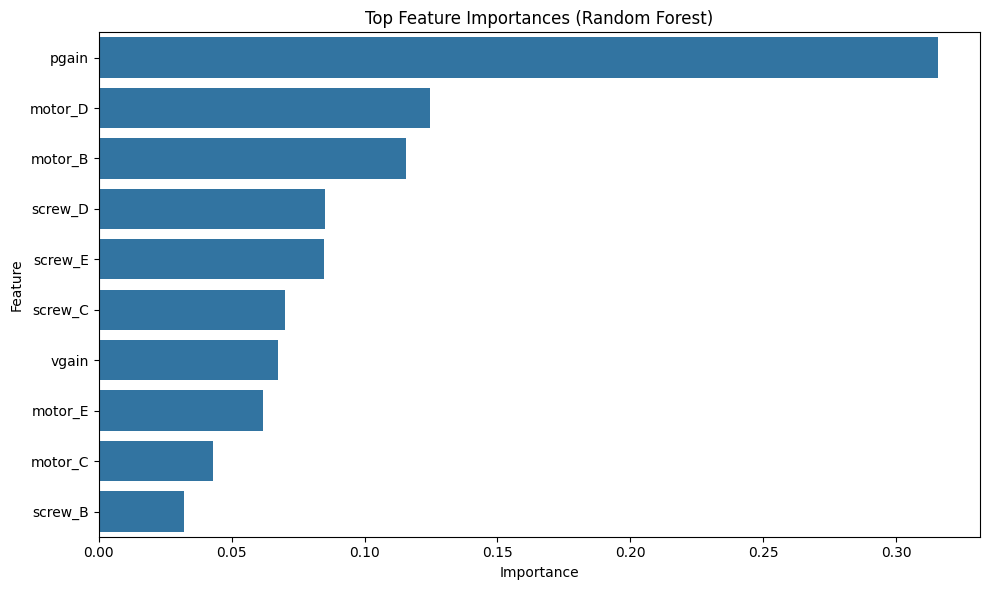

In [100]:
importances = best_xgb.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(20))  # Top 20 features
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Let the trees expand fully
    random_state=42,
    n_jobs=-1          # Use all cores
)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [95]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.3063
Mean Absolute Error (MAE): 0.3316
R² Score: 0.8734


In [96]:
from sklearn.model_selection import train_test_split, cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")


Cross-validated R² scores: [0.83857806 0.83575157 0.61065374 0.69932894 0.78637715]
Mean CV R²: 0.7541


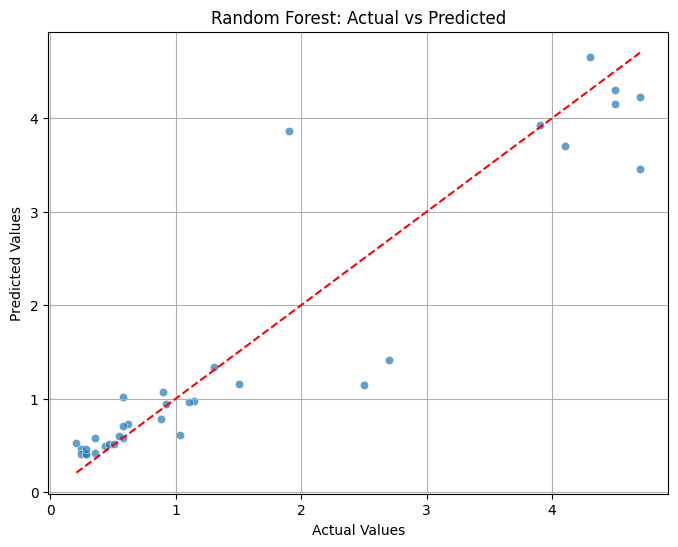

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()


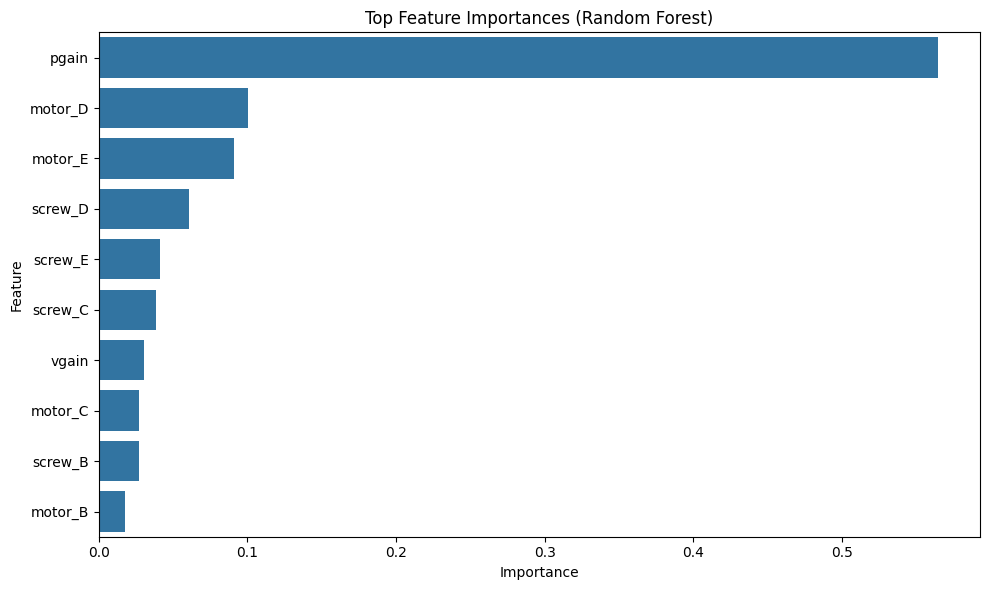

In [98]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(20))  # Top 20 features
plt.title("Top Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()
